**Project Title: Unmanned Aerial Vehicle(UAV) for Intrusion Detection dataset**

**Dataset Description:**

1) The Unmanned Aerial Vehicle(UAV) for Intrusion Detection dataset contains encrypted WiFi traffic records collected to classify the traffic as a UAV or not. This binary classification is useful to detect UAVs that could pose a threat to the security and privacy of the public.

2) In this dataset, 3 UAVs are considered, namely - Parrot Bebop 1, DBPower UDI, and DJI Spark. Overall, there are 6 datasets, 2 in each category of the UAV. A bidirectional and unidirectional traffic flow is considered for each of the UAVs. In the bidirectional traffic flow, there are 54 features in total (i.e., 9 statistical features like mean, median, standard deviation, etc., for 2 sources - packet sizes and packet inter-arrival time for 3 directional flows – uplink, downlink, and the total traffic flow). In the unidirectional traffic flow, there are 18 features (i.e., 9 statistical features for 2 sources).

3) There are no missing values, and the data contains no categorical values as the datatype of the dataset is float64.

4) The test data has more data points than the training data. This shows the number of data points after combining all 3 bidirectional datasets and 3 unidirectional datasets.

Bidirectional :-

Training: 3820; Test : 38316

Unidirectional :-

Training : 2421; Test : 11958

5) The dataset is slightly unbalanced. (where 1 denotes UAV traffic and 0 denotes not UAV)

Bidirectional, training:-

1.0 1979

0.0 1841

Bidirectional, test:-

1.0 20137

0.0 18179

Unidirectional, training:-

1.0 1279

0.0 1142

Unidirectional, test:-

0.0 6184

1.0 5774

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import h5py
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the data from .mat files 
f = h5py.File('pub_dataset1.mat')
data1 = f.get('data_tr')[()]
df = pd.DataFrame(data = data1)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1741,1742,1743,1744,1745,1746,1747,1748,1749,1750
0,0.013633,0.176876,0.003496,0.004229,0.003080,0.009260,0.007539,0.000324,0.002441,0.014309,...,0.007854,0.002504,0.002629,0.059434,0.003563,0.168442,0.019276,0.003944,0.090587,0.001323
1,0.009907,0.328222,0.004608,0.005576,0.005691,0.010661,0.008812,0.000809,0.005261,0.011310,...,0.009360,0.002549,0.004565,0.088085,0.006011,0.449148,0.023218,0.005735,0.253379,0.001244
2,0.012473,0.050990,0.001605,0.000986,0.000934,0.002485,0.002712,0.000010,0.000250,0.016719,...,0.003263,0.001797,0.000656,0.027748,0.000909,0.024904,0.014205,0.001150,0.006768,0.001010
3,0.013195,0.072377,0.001622,0.001195,0.000975,0.003616,0.002603,0.000015,0.000294,0.015544,...,0.004835,0.002322,0.000759,0.040007,0.000967,0.036848,0.020036,0.001297,0.009749,0.000984
4,0.206939,2.746796,1.884811,1.088090,2.881301,0.630917,1.147765,5.228245,3.447387,-0.046691,...,1.023377,0.711282,4.032544,1.780995,2.176161,3.425184,0.260308,1.766728,3.066824,1.771218


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Columns: 1751 entries, 0 to 1750
dtypes: float64(1751)
memory usage: 752.5 KB


In [5]:
UAV_df = df.T

In [6]:
UAV_df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0.013633,0.009907,0.012473,0.013195,0.206939,-1.518004,0.029022,0.000002,0.016793,113.612245,...,125.07,148.422224,126.0,83.0256,6.183629,39.041176,1130.0,70.0,193.523564,1.0
1,0.176876,0.328222,0.050990,0.072377,2.746796,7.799352,1.629773,0.000309,0.369391,487.000000,...,383.66,313.268698,307.0,126.0210,2.542834,5.425483,1476.0,216.0,494.318622,0.0
2,0.003496,0.004608,0.001605,0.001622,1.884811,2.649103,0.018668,0.000177,0.005718,96.857143,...,451.19,414.950105,150.0,109.7124,0.358598,-1.731709,1108.0,76.0,611.583330,1.0
3,0.004229,0.005576,0.000986,0.001195,1.088090,-0.287253,0.018410,0.000009,0.006926,98.225806,...,444.06,389.912910,147.0,105.2646,0.311359,-1.699683,1094.0,76.0,589.661801,1.0
4,0.003080,0.005691,0.000934,0.000975,2.881301,8.274496,0.026786,0.000011,0.006387,96.533333,...,483.52,404.892316,417.0,505.5666,0.198671,-1.704260,1218.0,76.0,629.356815,1.0


In [7]:
#dataframe summary
UAV_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
count,1751.000000,1751.000000,1.751000e+03,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,...,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000
mean,1.666571,6.807601,1.550456e-01,0.065309,2.240630,6.366267,37.672488,0.019586,6.907849,264.005326,...,563.603969,427.746111,475.443461,101.428552,0.763706,1.300514,1256.871502,141.605939,713.947136,0.546545
std,18.891608,80.526080,2.596734e+00,0.591655,1.430086,9.863575,474.817925,0.380726,80.714051,277.069686,...,276.441757,171.571370,495.027393,170.591646,1.461308,8.523491,378.510152,78.794917,307.607142,0.497971
min,0.000097,0.000047,9.999999e-07,0.000000,-0.845145,-2.750000,0.000160,0.000000,0.000108,64.666667,...,83.310000,4.757174,62.000000,0.000000,-5.235293,-2.010931,141.000000,61.000000,89.508435,0.000000
25%,0.003843,0.005951,1.104378e-03,0.001134,1.257808,0.310903,0.024589,0.000020,0.006979,98.789409,...,405.310000,385.024654,145.000000,0.000000,-0.005107,-1.831608,1110.000000,70.000000,565.656502,0.000000
50%,0.008349,0.010150,2.387073e-03,0.002617,1.961280,3.076183,0.028958,0.000104,0.013528,114.852941,...,489.890000,446.897776,232.500000,47.443200,0.405408,-1.536752,1145.000000,76.000000,663.266485,1.000000
75%,0.056374,0.113055,6.635250e-03,0.008798,2.880367,8.077575,0.497264,0.000172,0.122546,308.871730,...,677.455000,516.483943,620.750000,109.712400,1.144685,0.082496,1646.000000,216.000000,858.459106,1.000000
max,582.693350,1949.488161,6.200286e+01,19.011206,9.141791,84.381947,12783.920643,13.396030,1949.529861,1654.717391,...,1620.640000,729.282341,1676.000000,1070.437200,9.254201,87.297646,1676.000000,304.000000,1635.989633,1.000000


In [8]:
f2 = h5py.File('pub_dataset2.mat')
data2 = f2.get('data_tr')[()]
df2 = pd.DataFrame(data = data2)

UAV_df2 = df2.T

#UAV_df2.info()

In [9]:
f3 = h5py.File('pub_dataset3.mat')
data3 = f3.get('data_tr')[()]
df3 = pd.DataFrame(data = data3)

UAV_df3 = df3.T

#UAV_df3.info()

In [10]:
f4 = h5py.File('pub_dataset4.mat')
data4 = f4.get('data_tr')[()]
df4 = pd.DataFrame(data = data4)

UAV_df4 = df4.T

#UAV_df4.info()

In [11]:
f5 = h5py.File('pub_dataset5.mat')
data5 = f5.get('data_tr')[()]
df5 = pd.DataFrame(data = data5)

UAV_df5 = df5.T

# UAV_df5.info()

In [12]:
f6 = h5py.File('pub_dataset6.mat')
data6 = f6.get('data_tr')[()]
df6 = pd.DataFrame(data = data6)

UAV_df6 = df6.T

#UAV_df6.info()

In [13]:
#Combining the bidirectional dataset 
bidir = pd.concat([UAV_df, UAV_df2, UAV_df3])

#bidir.info()

In [14]:
#Combining the unidirrcetional dataset 
unidir = pd.concat([UAV_df4, UAV_df5, UAV_df6])

#unidir.info()

In [15]:
bidir

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0.013633,0.009907,0.012473,0.013195,0.206939,-1.518004,0.029022,0.000002,0.016793,113.612245,...,125.07,148.422224,126.0,83.0256,6.183629,39.041176,1130.0,70.0,193.523564,1.0
1,0.176876,0.328222,0.050990,0.072377,2.746796,7.799352,1.629773,0.000309,0.369391,487.000000,...,383.66,313.268698,307.0,126.0210,2.542834,5.425483,1476.0,216.0,494.318622,0.0
2,0.003496,0.004608,0.001605,0.001622,1.884811,2.649103,0.018668,0.000177,0.005718,96.857143,...,451.19,414.950105,150.0,109.7124,0.358598,-1.731709,1108.0,76.0,611.583330,1.0
3,0.004229,0.005576,0.000986,0.001195,1.088090,-0.287253,0.018410,0.000009,0.006926,98.225806,...,444.06,389.912910,147.0,105.2646,0.311359,-1.699683,1094.0,76.0,589.661801,1.0
4,0.003080,0.005691,0.000934,0.000975,2.881301,8.274496,0.026786,0.000011,0.006387,96.533333,...,483.52,404.892316,417.0,505.5666,0.198671,-1.704260,1218.0,76.0,629.356815,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.193349,0.590532,0.006516,0.009537,3.130454,8.654443,2.375171,0.000167,0.603587,289.000000,...,1426.88,515.966354,1664.0,0.0000,-1.730583,1.007534,1664.0,288.0,1516.425270,0.0
496,0.014869,0.033200,0.001495,0.001988,2.801717,7.230425,0.148166,0.000118,0.035987,354.153846,...,1067.85,702.582658,1676.0,0.0000,-0.339889,-1.868430,1676.0,216.0,1276.318843,0.0
497,0.005127,0.008620,0.001837,0.002560,2.013866,2.911653,0.032482,0.000029,0.009916,310.545455,...,1030.76,674.397421,1527.0,220.9074,-0.147541,-1.910068,1676.0,228.0,1229.930868,0.0
498,2.986887,10.339577,0.049437,0.073295,4.557322,21.349140,60.050333,0.000144,10.634244,245.487179,...,270.69,119.678922,228.0,17.7912,6.101528,47.116659,1276.0,216.0,295.724348,0.0


In [16]:
unidir

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000278,0.001051,0.000010,0.000009,8.209810,73.338288,0.010098,0.000003,0.001082,111.40,36.432309,138.0,0.0000,-0.619560,-1.632168,138.0,62.0,117.149477,1.0
1,0.011074,0.027982,0.001357,0.001533,3.826652,15.115991,0.156918,0.000117,0.029964,1190.15,489.154504,1476.0,0.0000,-1.234103,-0.301984,1476.0,222.0,1285.821306,0.0
2,0.000439,0.000854,0.000128,0.000185,2.048102,2.360037,0.002625,0.000000,0.000957,100.45,38.726541,100.0,56.3388,0.014044,-1.996982,153.0,62.0,107.586942,1.0
3,0.000181,0.000236,0.000135,0.000120,2.449888,5.232243,0.000962,0.000003,0.000297,86.32,35.630789,62.0,0.0000,0.760196,-1.436164,138.0,62.0,93.316665,1.0
4,0.000350,0.000749,0.000132,0.000148,2.962924,7.338491,0.003069,0.000004,0.000824,87.82,38.034376,62.0,0.0000,0.795772,-1.326532,153.0,62.0,95.626879,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,0.003500,0.004243,0.002131,0.002714,4.047414,29.207833,0.034427,0.000006,0.005484,112.70,38.239146,109.5,49.6671,0.249606,1.333212,165.0,76.0,118.949149,1.0
3,0.000685,0.000879,0.000517,0.000022,6.029786,39.522547,0.006628,0.000399,0.001110,85.80,1.407053,86.0,0.0000,-6.857143,48.020408,86.0,76.0,85.811421,1.0
4,0.009514,0.089832,0.000515,0.000006,9.849347,98.009791,0.898849,0.000282,0.089887,87.58,11.115718,86.0,0.0000,6.857143,48.020408,165.0,86.0,88.275591,1.0
5,0.009842,0.093143,0.000516,0.000008,9.849345,98.009773,0.931956,0.000223,0.093197,87.41,8.057991,86.0,0.0000,5.510378,31.364261,133.0,86.0,87.776933,1.0


In [17]:
#Creating a copy for approach 2 
bidir_app2= bidir.copy()
unidir_app2 = unidir.copy()

In [18]:
bidir[54].value_counts()

1.0    1979
0.0    1841
Name: 54, dtype: int64

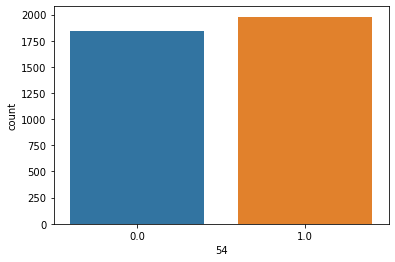

In [19]:
y = bidir[54]
ax = sns.countplot(y)

The bidirectional dataset is unbalanced with 1841 datapoints in the 0 class and 1979 datapoints in 1 class

In [20]:
unidir[18].value_counts()

1.0    1279
0.0    1142
Name: 18, dtype: int64

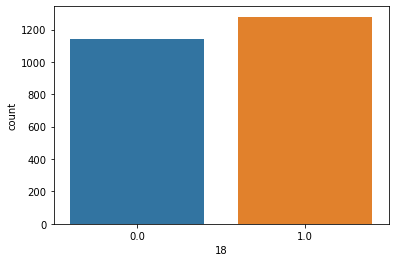

In [21]:
y = unidir[18]
ax = sns.countplot(y)

The unidirectional dataset is unbalanced with 1142 datapoints in the 0 class and 1279 datapoints in 1 class

In [18]:
# Test dataset import 

Tdata1 = f.get('data_te')[()]
T_df1 = pd.DataFrame(data = Tdata1)
T_UAV_df = T_df1.T

Tdata2 = f2.get('data_te')[()]
T_df2 = pd.DataFrame(data = Tdata2)
T_UAV_df2 = T_df2.T

Tdata3 = f3.get('data_te')[()]
T_df3 = pd.DataFrame(data = Tdata3)
T_UAV_df3 = T_df3.T

Tdata4 = f4.get('data_te')[()]
T_df4 = pd.DataFrame(data = Tdata4)
T_UAV_df4 = T_df4.T

Tdata5 = f5.get('data_te')[()]
T_df5 = pd.DataFrame(data = Tdata5)
T_UAV_df5 = T_df5.T

Tdata6 = f6.get('data_te')[()]
T_df6 = pd.DataFrame(data = Tdata6)
T_UAV_df6 = T_df6.T

In [19]:
#Combining the birectional test inputs into a single dataframe 
test_bidir = pd.concat([T_UAV_df, T_UAV_df2, T_UAV_df3])
#Combining the Unidirectional test inputs into a single dataframe 
test_unidir = pd.concat([T_UAV_df4, T_UAV_df5, T_UAV_df6])

In [24]:
test_bidir[54].value_counts()

1.0    20137
0.0    18179
Name: 54, dtype: int64

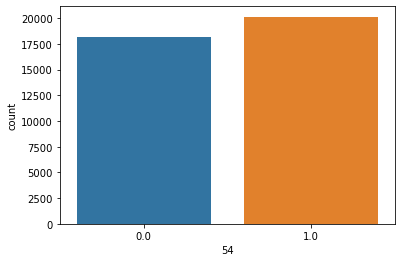

In [86]:
y = test_bidir[54]
ax = sns.countplot(y)

The bidirectional test dataset is unbalanced with 20137 datapoints in class 1 and 18179 datapoints in class 0

In [25]:
test_unidir[18].value_counts()

1.0    12892
0.0    11287
Name: 18, dtype: int64

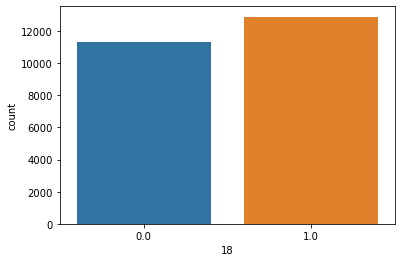

In [87]:
y = test_unidir[18]
ax = sns.countplot(y)

The unidirectional test dataset is unbalanced with 12892 datapoints in class 1 and 11287 datapoints in class 0.

In [26]:
#creating a copy of test dataset for approach 2 
test_bidir_App2= test_bidir.copy()
test_unidir_App2= test_unidir.copy()

In [27]:
test_bidir.columns

RangeIndex(start=0, stop=55, step=1)

**Visualizing dataset1**

In [28]:
y = UAV_df[54]
x = UAV_df

data_dia = y
data = x.drop(54, axis=1)

data_n_2 = (data - data.mean()) / (data.std())              # standardization

In [29]:
data = pd.concat([y,data_n_2.iloc[:, 0:18]],axis=1) #Spliting only the first 18 features to have clear plots
data = pd.melt(data,id_vars=54,
                    var_name="features",
                    value_name='value')
data

,54,features,value
0,1.0,0,-0.087496
1,0.0,0,-0.078855
2,1.0,0,-0.088032
3,1.0,0,-0.087994
4,1.0,0,-0.088054
...,...,...,...
31513,0.0,17,-0.159031
31514,0.0,17,0.348498
31515,1.0,17,-0.618934
31516,0.0,17,0.020780


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17')])

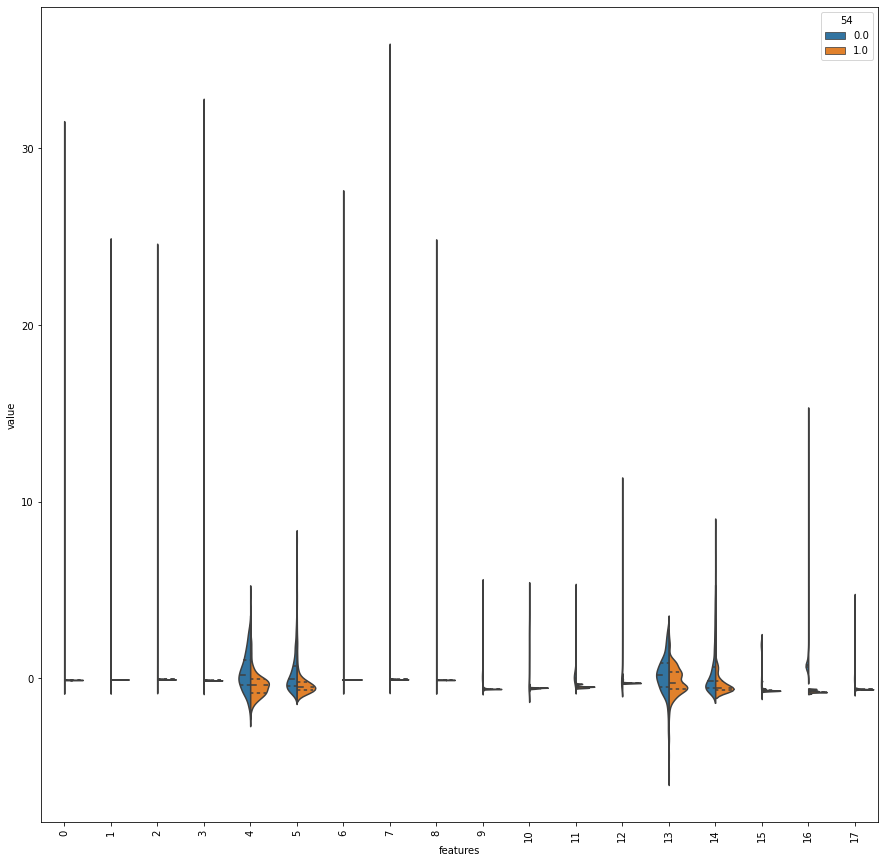

In [30]:
#creating a violin plot for the input features
plt.figure(figsize=(15,15))
sns.violinplot(x="features", y="value", hue=54, data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17')])

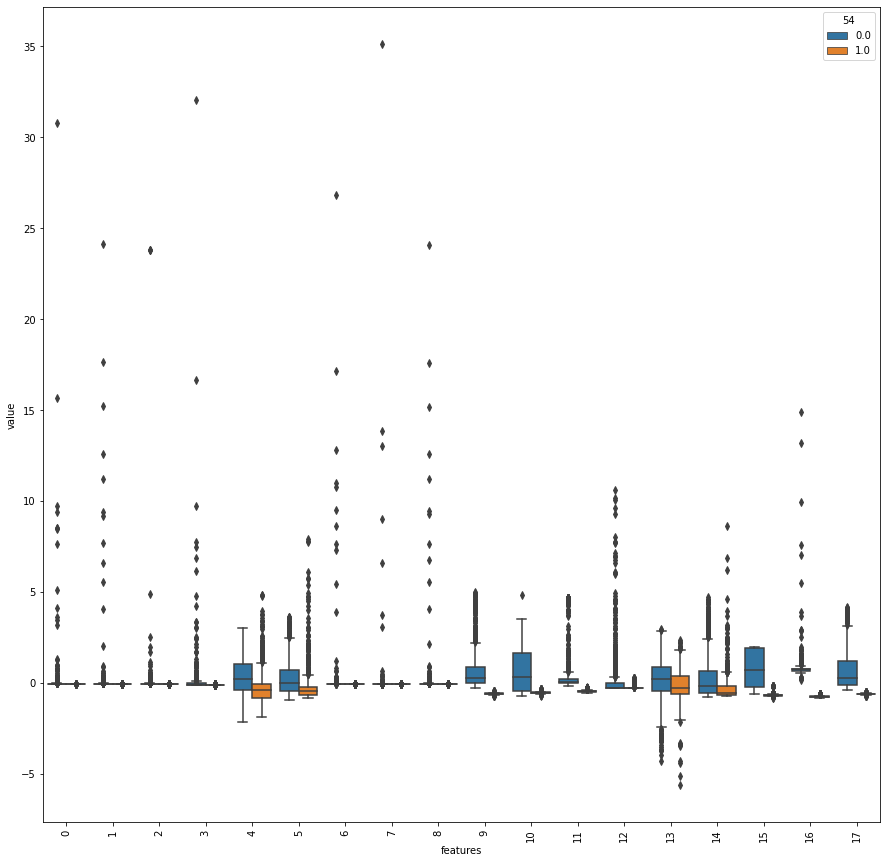

In [31]:
#creating box plot for the input features
plt.figure(figsize=(15,15))
sns.boxplot(x="features", y="value", hue=54, data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35')])

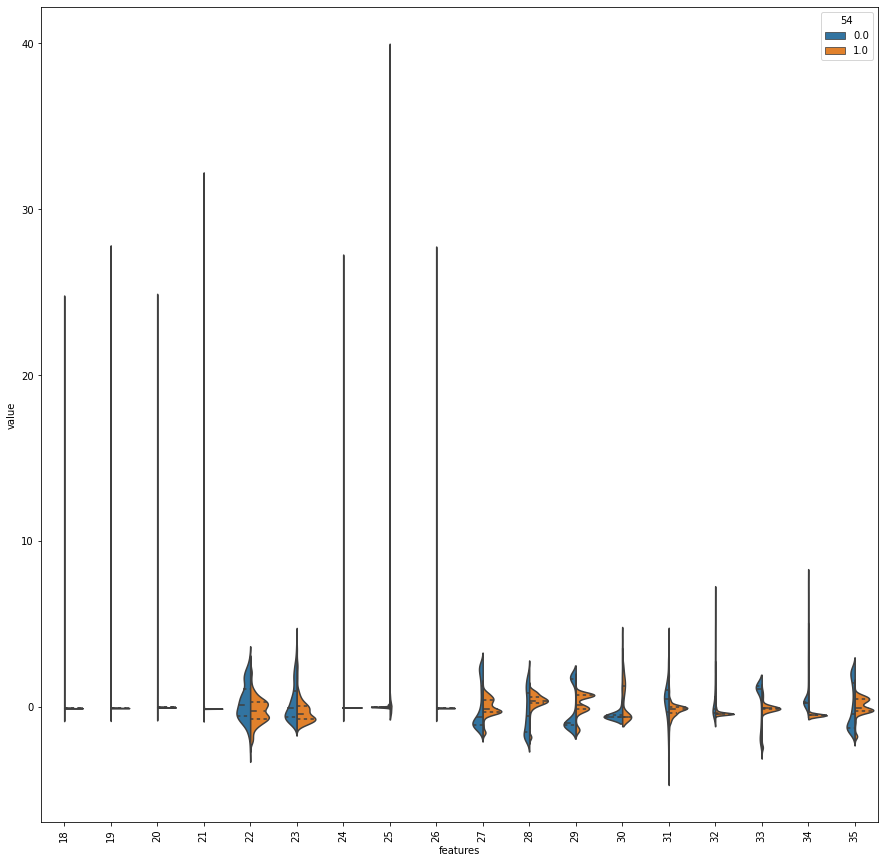

In [32]:
data = pd.concat([y,data_n_2.iloc[:,18:36]],axis=1) #plot for featires from 18 to 36 
data = pd.melt(data,id_vars=54,
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,15))
sns.violinplot(x="features", y="value", hue=54, data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35')])

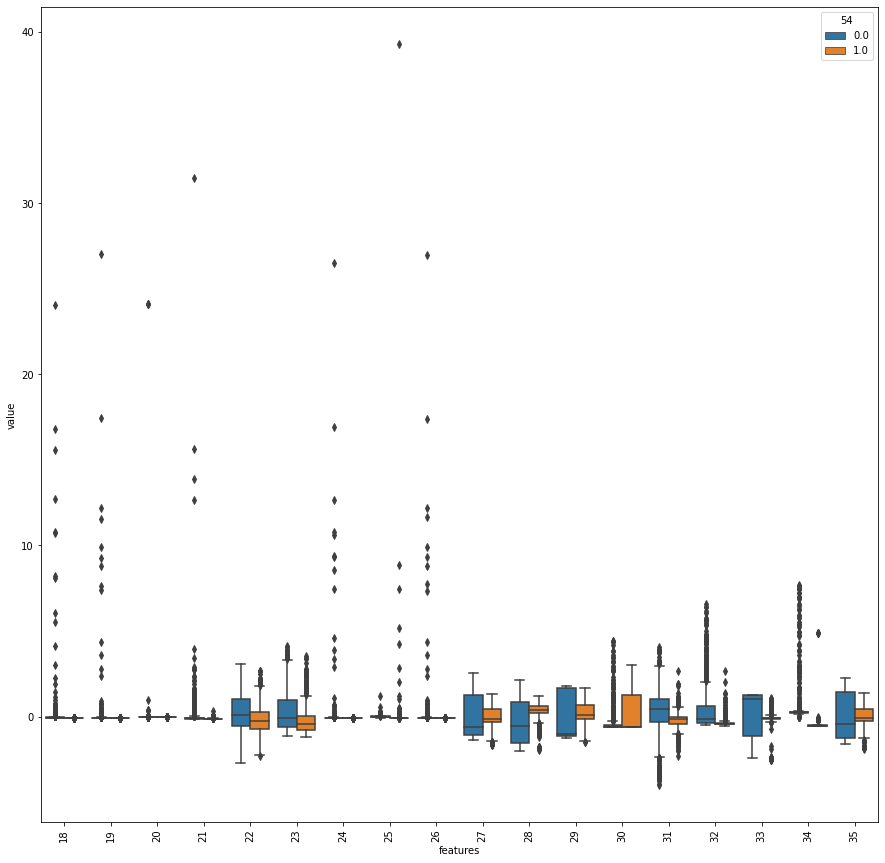

In [33]:
plt.figure(figsize=(15,15))
sns.boxplot(x="features", y="value", hue=54, data=data) #Box plot for featires from 18 to 36
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '36'),
  Text(1, 0, '37'),
  Text(2, 0, '38'),
  Text(3, 0, '39'),
  Text(4, 0, '40'),
  Text(5, 0, '41'),
  Text(6, 0, '42'),
  Text(7, 0, '43'),
  Text(8, 0, '44'),
  Text(9, 0, '45'),
  Text(10, 0, '46'),
  Text(11, 0, '47'),
  Text(12, 0, '48'),
  Text(13, 0, '49'),
  Text(14, 0, '50'),
  Text(15, 0, '51'),
  Text(16, 0, '52'),
  Text(17, 0, '53')])

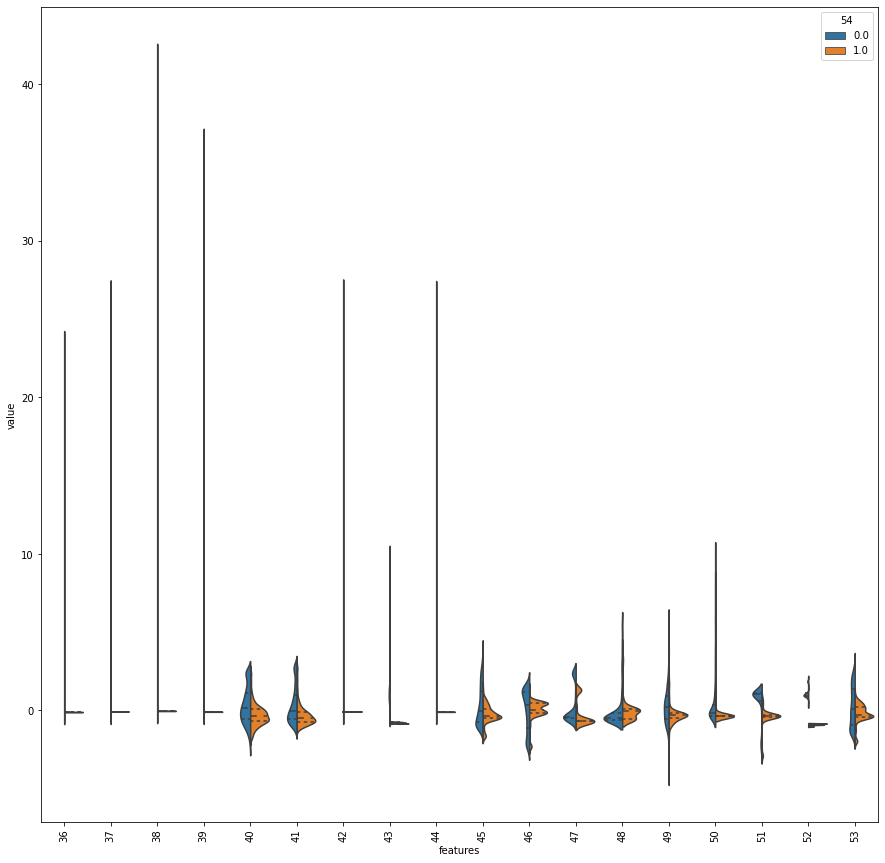

In [34]:
#Plot for features from 36 to 54
data = pd.concat([y,data_n_2.iloc[:,36:54]],axis=1) 
data = pd.melt(data,id_vars=54,
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,15))
sns.violinplot(x="features", y="value", hue=54, data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '36'),
  Text(1, 0, '37'),
  Text(2, 0, '38'),
  Text(3, 0, '39'),
  Text(4, 0, '40'),
  Text(5, 0, '41'),
  Text(6, 0, '42'),
  Text(7, 0, '43'),
  Text(8, 0, '44'),
  Text(9, 0, '45'),
  Text(10, 0, '46'),
  Text(11, 0, '47'),
  Text(12, 0, '48'),
  Text(13, 0, '49'),
  Text(14, 0, '50'),
  Text(15, 0, '51'),
  Text(16, 0, '52'),
  Text(17, 0, '53')])

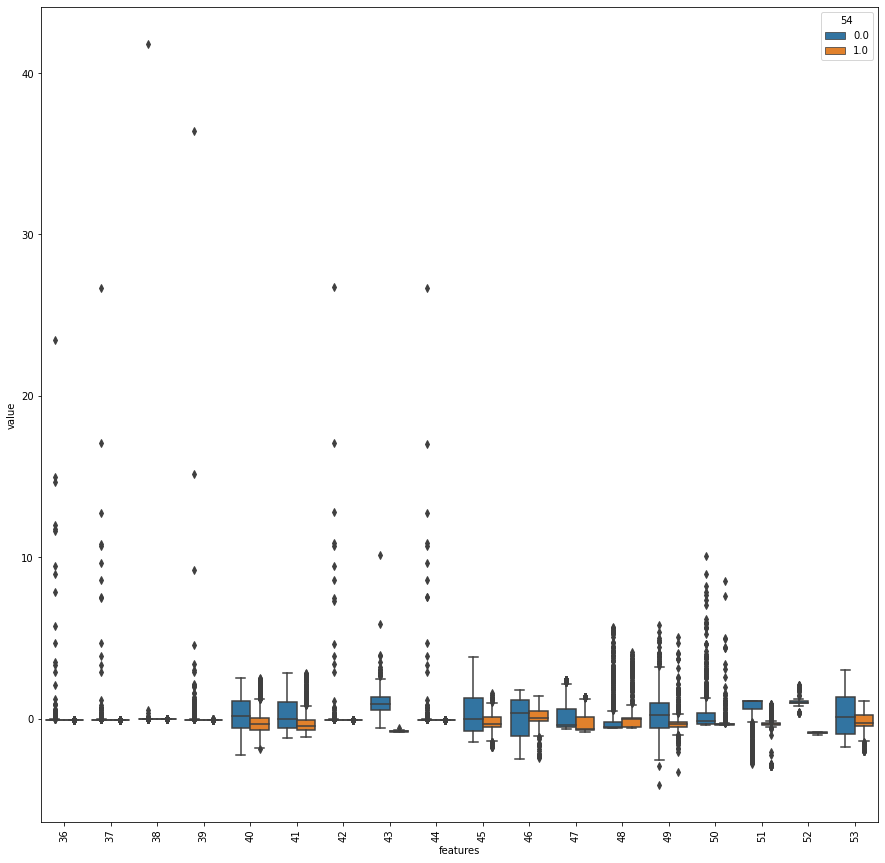

In [35]:
#Box Plot for features from 36 to 54
plt.figure(figsize=(15,15))
sns.boxplot(x="features", y="value", hue=54, data=data)
plt.xticks(rotation=90)

**Interpretation:**

From the above plots we can see that the following features look similar in the sense that not much data is available and they do not contribute any relevant information about the dataset:-

Feature Number - 0, 1, 2, 3, 6, 7, 8, 18, 19, 20, 21, 24, 25, 26, 34, 36, 37, 38, 39, 42, 44

Let us plot the bidir dataset(which is the combination of dataset1, dataset2, dataset3)

In [36]:
y = bidir[54]
x = bidir

data_dia = y
data = x.drop(54, axis=1)

data_n_2 = (data - data.mean()) / (data.std())              # standardization

In [37]:
data = pd.concat([y,data_n_2.iloc[:,0:18]],axis=1)
data = pd.melt(data,id_vars=54,
                    var_name="features",
                    value_name='value')
data

,54,features,value
0,1.0,0,-0.084654
1,0.0,0,-0.074176
2,1.0,0,-0.085305
3,1.0,0,-0.085258
4,1.0,0,-0.085332
...,...,...,...
68755,0.0,17,-0.100649
68756,0.0,17,0.635796
68757,0.0,17,0.078594
68758,0.0,17,-0.219508


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17')])

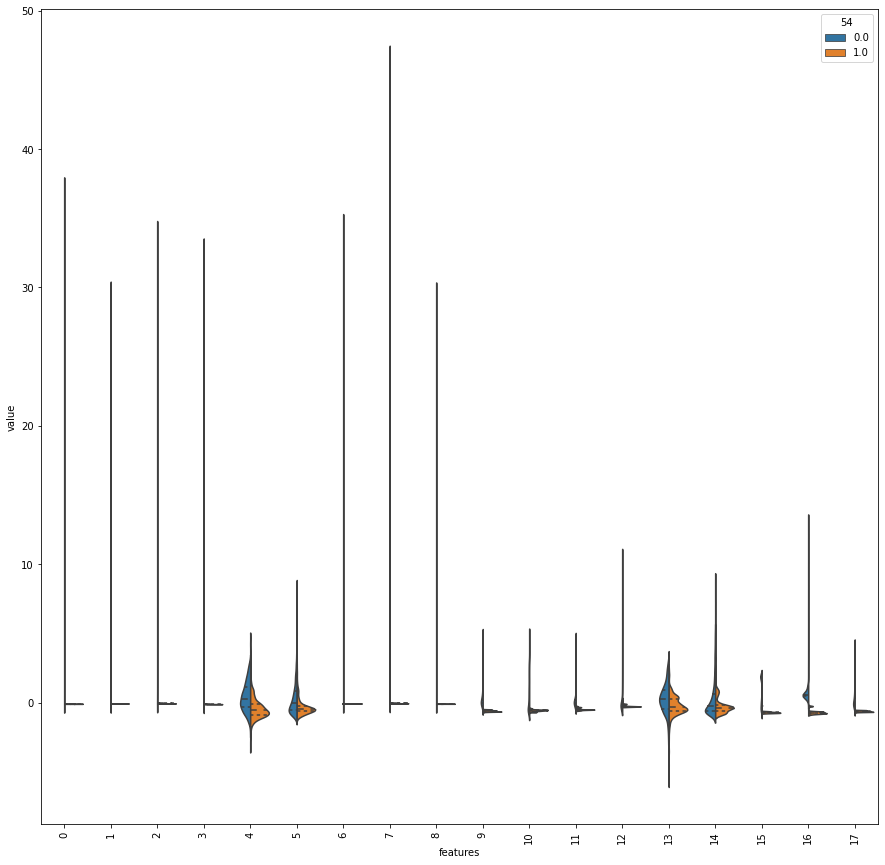

In [38]:
plt.figure(figsize=(15,15))
sns.violinplot(x="features", y="value", hue=54, data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17')])

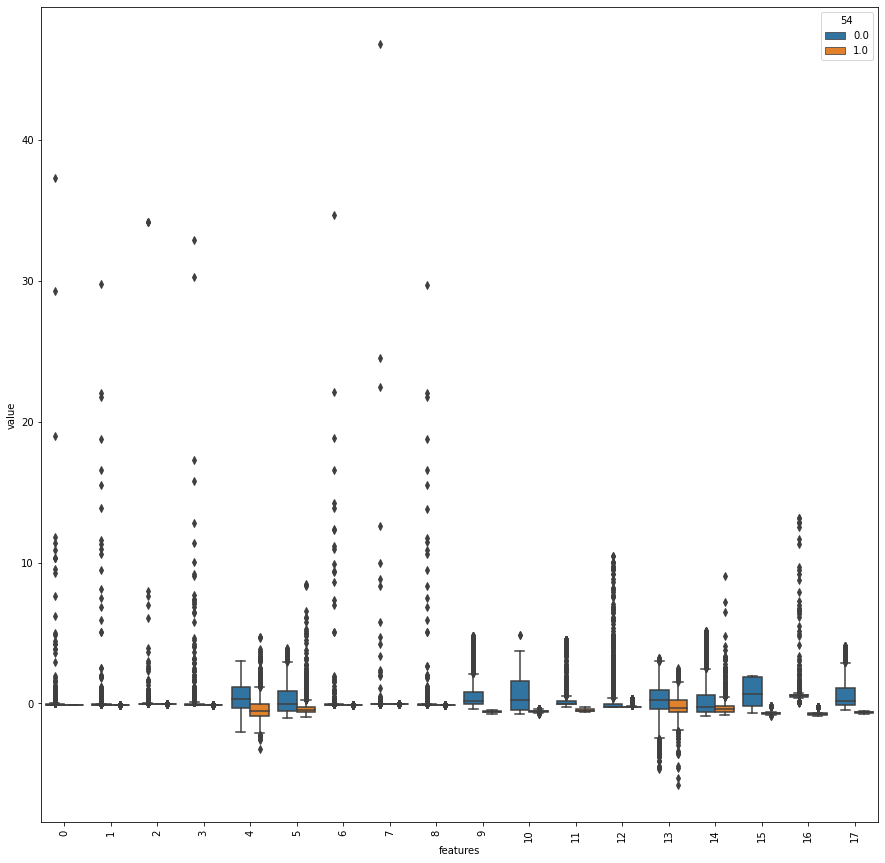

In [39]:
plt.figure(figsize=(15,15))
sns.boxplot(x="features", y="value", hue=54, data=data)
plt.xticks(rotation=90)

In [40]:
data = pd.concat([y,data_n_2.iloc[:,18:36]],axis=1)
data = pd.melt(data,id_vars=54,
                    var_name="features",
                    value_name='value')
data

,54,features,value
0,1.0,18,-0.090005
1,0.0,18,-0.073568
2,1.0,18,-0.091722
3,1.0,18,-0.091651
4,1.0,18,-0.091736
...,...,...,...
68755,0.0,35,1.903272
68756,0.0,35,1.729885
68757,0.0,35,1.500794
68758,0.0,35,-1.294453


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35')])

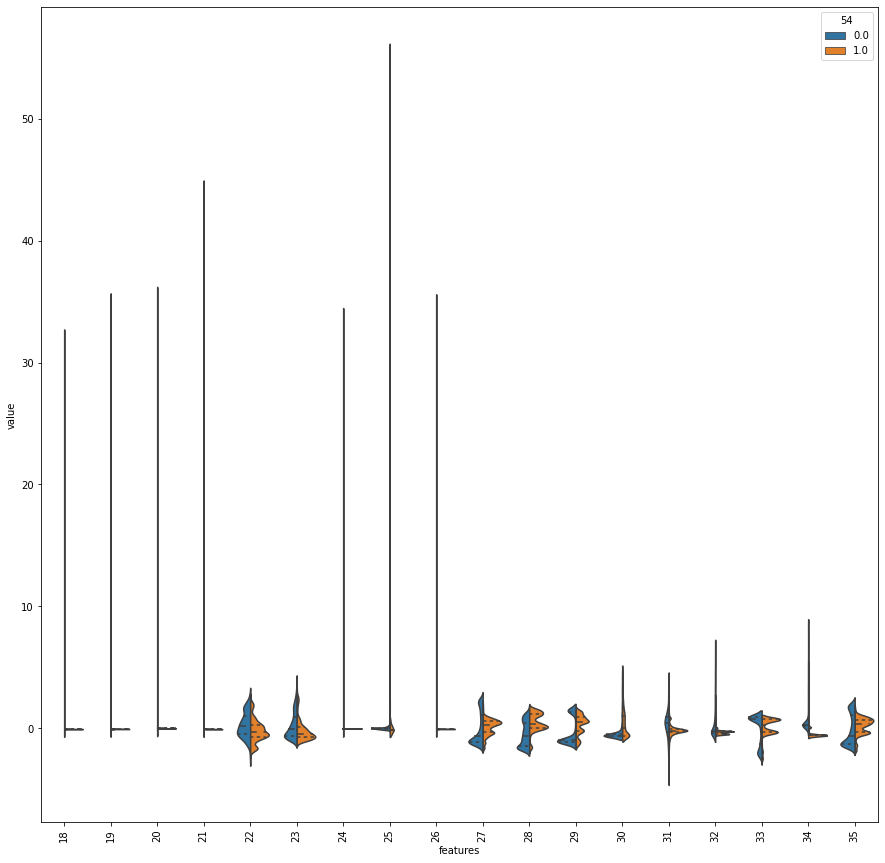

In [41]:
plt.figure(figsize=(15,15))
sns.violinplot(x="features", y="value", hue=54, data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35')])

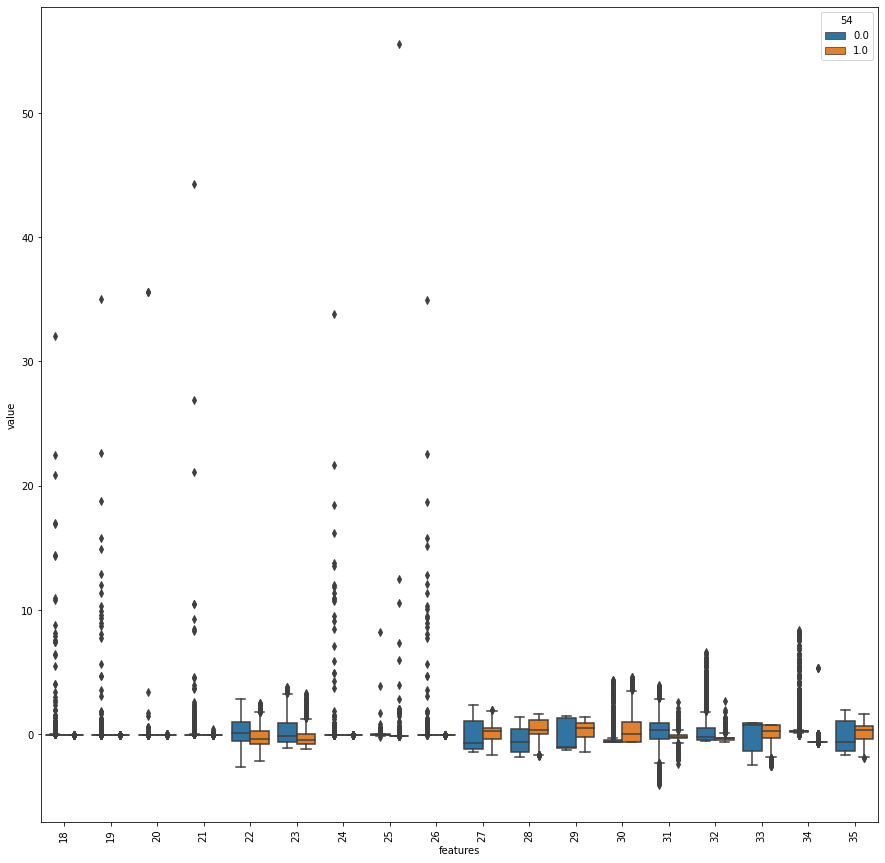

In [42]:
plt.figure(figsize=(15,15))
sns.boxplot(x="features", y="value", hue=54, data=data)
plt.xticks(rotation=90)

In [43]:
data = pd.concat([y,data_n_2.iloc[:,36:54]],axis=1)
data = pd.melt(data,id_vars=54,
                    var_name="features",
                    value_name='value')
data

,54,features,value
0,1.0,36,-0.096447
1,0.0,36,-0.080313
2,1.0,36,-0.097833
3,1.0,36,-0.097765
4,1.0,36,-0.097859
...,...,...,...
68755,0.0,53,2.277618
68756,0.0,53,1.540243
68757,0.0,53,1.397783
68758,0.0,53,-1.471200


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '36'),
  Text(1, 0, '37'),
  Text(2, 0, '38'),
  Text(3, 0, '39'),
  Text(4, 0, '40'),
  Text(5, 0, '41'),
  Text(6, 0, '42'),
  Text(7, 0, '43'),
  Text(8, 0, '44'),
  Text(9, 0, '45'),
  Text(10, 0, '46'),
  Text(11, 0, '47'),
  Text(12, 0, '48'),
  Text(13, 0, '49'),
  Text(14, 0, '50'),
  Text(15, 0, '51'),
  Text(16, 0, '52'),
  Text(17, 0, '53')])

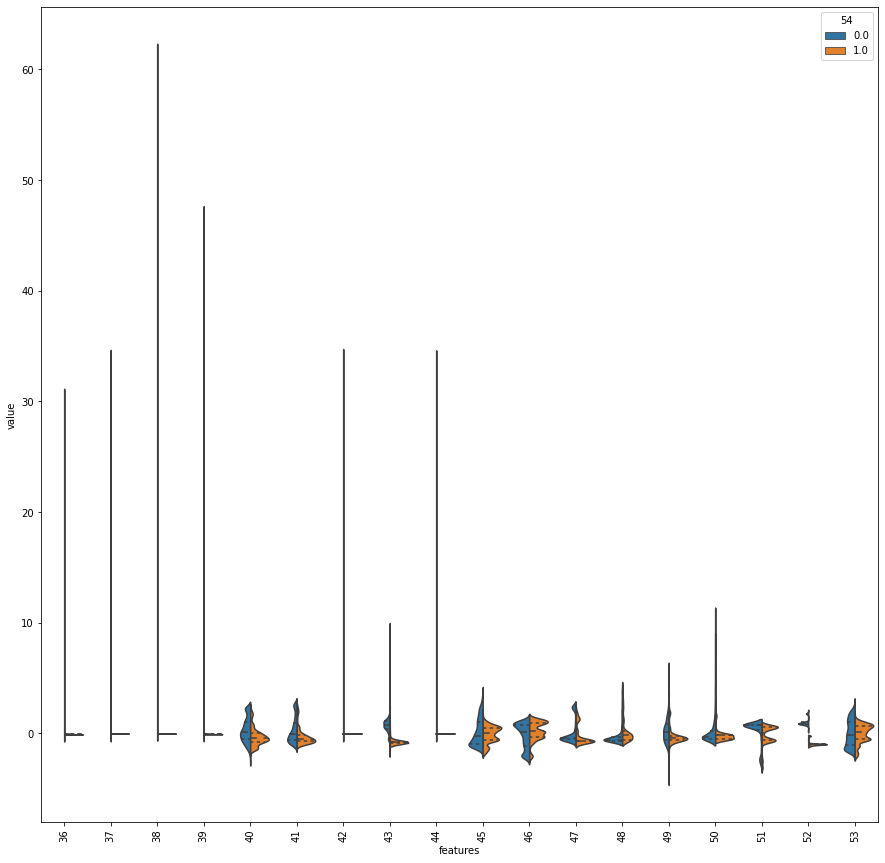

In [44]:
plt.figure(figsize=(15,15))
sns.violinplot(x="features", y="value", hue=54, data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '36'),
  Text(1, 0, '37'),
  Text(2, 0, '38'),
  Text(3, 0, '39'),
  Text(4, 0, '40'),
  Text(5, 0, '41'),
  Text(6, 0, '42'),
  Text(7, 0, '43'),
  Text(8, 0, '44'),
  Text(9, 0, '45'),
  Text(10, 0, '46'),
  Text(11, 0, '47'),
  Text(12, 0, '48'),
  Text(13, 0, '49'),
  Text(14, 0, '50'),
  Text(15, 0, '51'),
  Text(16, 0, '52'),
  Text(17, 0, '53')])

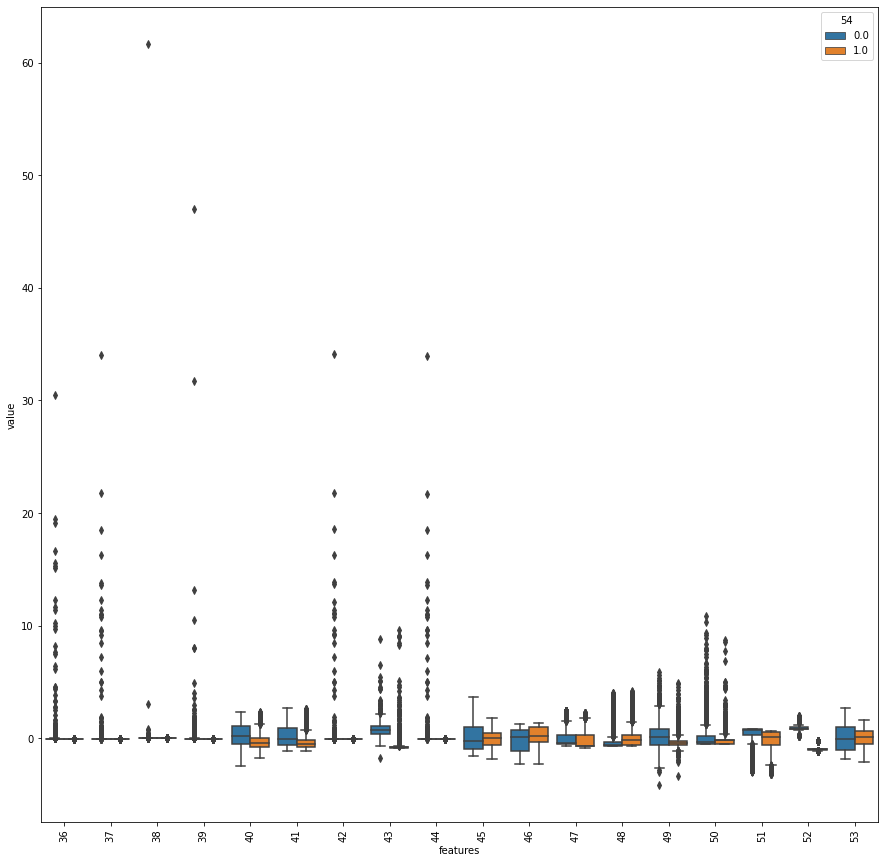

In [45]:
plt.figure(figsize=(15,15))
sns.boxplot(x="features", y="value", hue=54, data=data)
plt.xticks(rotation=90)

**Interpretation:**

From the above plots we can see that the following features look similar in the sense that not much data is available and they do not contribute any relevant information about the dataset:-

Feature Number - 0, 1, 2, 3, 6, 7, 8, 18, 19, 20, 21, 24, 25, 26, 34, 36, 37, 38, 39, 42, 44

This outcome is similar to what we observed with dataset 1. Therefore we can drop these features.

In [46]:
bidir = bidir.drop([0, 1, 2, 3, 6, 7, 8, 18, 19, 20, 21, 24, 25, 26, 34, 36, 37, 38, 39, 42, 44], axis = 1)
bidir

,4,5,9,10,11,12,13,14,15,16,...,45,46,47,48,49,50,51,52,53,54
0,0.206939,-1.518004,113.612245,32.643157,138.0,17.7912,-0.524785,-1.621986,153.0,70.0,...,125.07,148.422224,126.0,83.0256,6.183629,39.041176,1130.0,70.0,193.523564,1.0
1,2.746796,7.799352,487.000000,392.264657,395.5,255.7485,1.692933,1.546272,1476.0,222.0,...,383.66,313.268698,307.0,126.0210,2.542834,5.425483,1476.0,216.0,494.318622,0.0
2,1.884811,2.649103,96.857143,22.093596,88.0,0.0000,1.932871,1.804209,150.0,88.0,...,451.19,414.950105,150.0,109.7124,0.358598,-1.731709,1108.0,76.0,611.583330,1.0
3,1.088090,-0.287253,98.225806,28.208403,88.0,0.0000,2.800722,8.100519,218.0,76.0,...,444.06,389.912910,147.0,105.2646,0.311359,-1.699683,1094.0,76.0,589.661801,1.0
4,2.881301,8.274496,96.533333,27.042410,88.0,0.0000,3.245917,10.956115,218.0,76.0,...,483.52,404.892316,417.0,505.5666,0.198671,-1.704260,1218.0,76.0,629.356815,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,3.130454,8.654443,289.000000,4.000000,288.0,0.0000,3.281250,9.363281,304.0,288.0,...,1426.88,515.966354,1664.0,0.0000,-1.730583,1.007534,1664.0,288.0,1516.425270,0.0
496,2.801717,7.230425,354.153846,402.755413,216.0,0.0000,2.519999,4.486692,1591.0,216.0,...,1067.85,702.582658,1676.0,0.0000,-0.339889,-1.868430,1676.0,216.0,1276.318843,0.0
497,2.013866,2.911653,310.545455,160.087884,228.0,0.0000,1.581092,0.661690,701.0,228.0,...,1030.76,674.397421,1527.0,220.9074,-0.147541,-1.910068,1676.0,228.0,1229.930868,0.0
498,4.557322,21.349140,245.487179,46.505728,228.0,17.7912,2.532286,6.574308,435.0,216.0,...,270.69,119.678922,228.0,17.7912,6.101528,47.116659,1276.0,216.0,295.724348,0.0


In [47]:
# Applying the datapreprocessing steps to bidirectional test dataset as well
test_bidir = test_bidir.drop([0, 1, 2, 3, 6, 7, 8, 18, 19, 20, 21, 24, 25, 26, 34, 36, 37, 38, 39, 42, 44], axis = 1)

In [48]:
#Visualizing bidirectional dataset after feature selection 
y = bidir[54]
x = bidir

data_dia = y
data = x.drop(54, axis=1)

data_n_2 = (data - data.mean()) / (data.std())              # standardization

In [49]:
data = pd.concat([y,data_n_2.iloc[:,0:33]],axis=1)
data = pd.melt(data,id_vars=54,
                    var_name="features",
                    value_name='value')
data

,54,features,value
0,1.0,4,-1.333797
1,0.0,4,0.385019
2,1.0,4,-0.198319
3,1.0,4,-0.737489
4,1.0,4,0.476044
...,...,...,...
126055,0.0,53,2.277618
126056,0.0,53,1.540243
126057,0.0,53,1.397783
126058,0.0,53,-1.471200


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '4'),
  Text(1, 0, '5'),
  Text(2, 0, '9'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '16'),
  Text(10, 0, '17'),
  Text(11, 0, '22'),
  Text(12, 0, '23'),
  Text(13, 0, '27'),
  Text(14, 0, '28'),
  Text(15, 0, '29'),
  Text(16, 0, '30'),
  Text(17, 0, '31'),
  Text(18, 0, '32'),
  Text(19, 0, '33'),
  Text(20, 0, '35'),
  Text(21, 0, '40'),
  Text(22, 0, '41'),
  Text(23, 0, '43'),
  Text(24, 0, '45'),
  Text(25, 0, '46'),
  Text(26, 0, '47'),
  Text(27, 0, '48'),
  Text(28, 0, '49'),
  Text(29, 0, '50'),
  Text(30, 0, '51'),
  Text(31, 0, '52'),
  Text(32, 0, '53')])

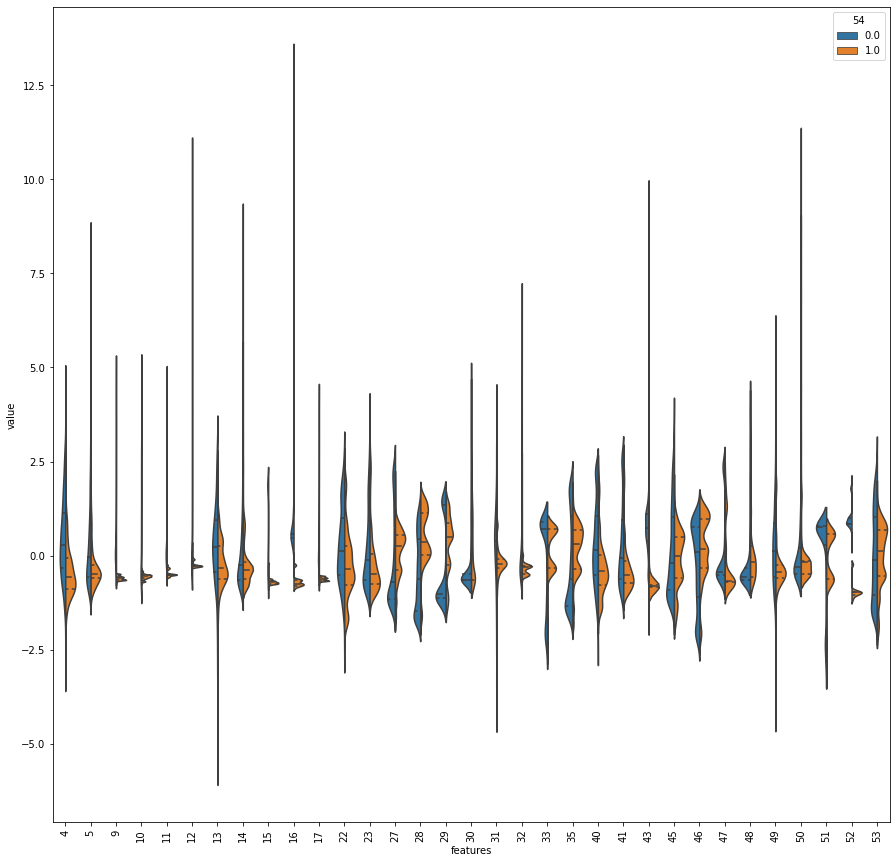

In [50]:
plt.figure(figsize=(15,15))
sns.violinplot(x="features", y="value", hue=54, data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '4'),
  Text(1, 0, '5'),
  Text(2, 0, '9'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '16'),
  Text(10, 0, '17'),
  Text(11, 0, '22'),
  Text(12, 0, '23'),
  Text(13, 0, '27'),
  Text(14, 0, '28'),
  Text(15, 0, '29'),
  Text(16, 0, '30'),
  Text(17, 0, '31'),
  Text(18, 0, '32'),
  Text(19, 0, '33'),
  Text(20, 0, '35'),
  Text(21, 0, '40'),
  Text(22, 0, '41'),
  Text(23, 0, '43'),
  Text(24, 0, '45'),
  Text(25, 0, '46'),
  Text(26, 0, '47'),
  Text(27, 0, '48'),
  Text(28, 0, '49'),
  Text(29, 0, '50'),
  Text(30, 0, '51'),
  Text(31, 0, '52'),
  Text(32, 0, '53')])

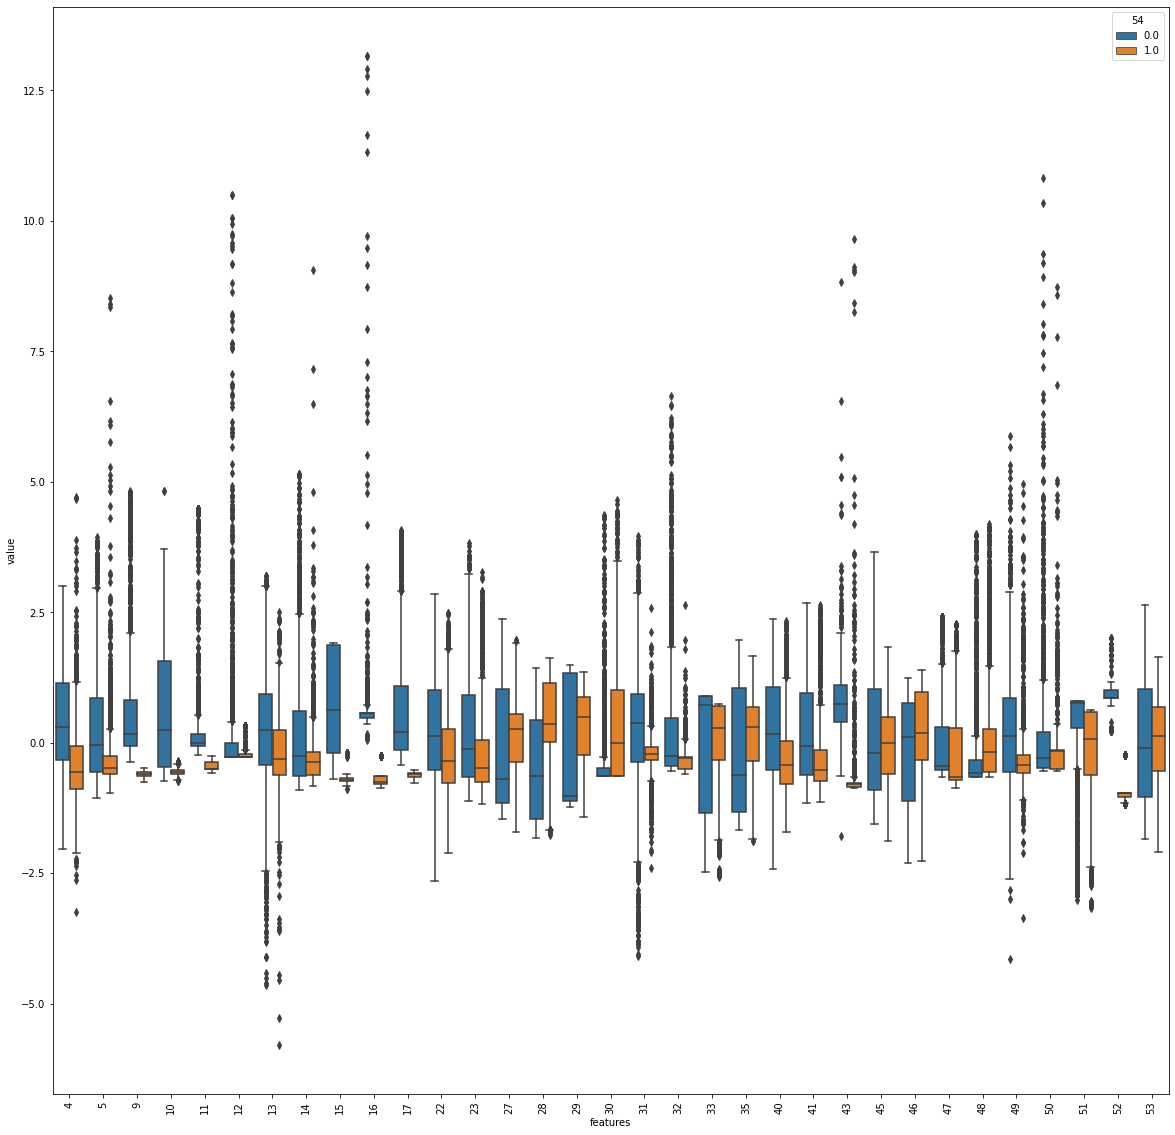

In [51]:
plt.figure(figsize=(20,20))
sns.boxplot(x="features", y="value", hue=54, data=data)
plt.xticks(rotation=90)

<AxesSubplot:>

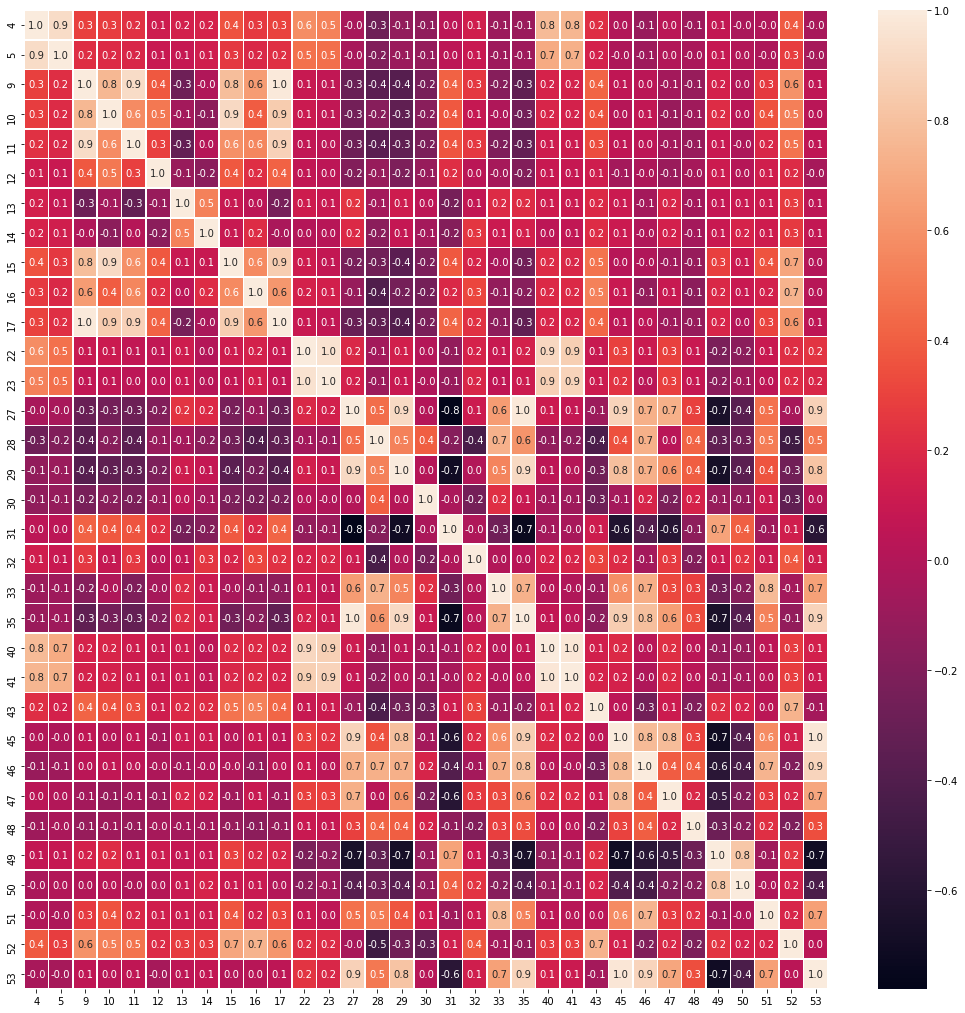

In [52]:
#correlation matrix for bidrectional dataset after feature selection 
y = bidir[54]
x = bidir.drop(54, axis = 1) 

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

The correlation between the different features can be visualized using the above heat map and the relationship between the features can be inferred.

To visualize the correlation we have used the pairplot function.

**Visualizing the unidirectional dataset**

In [53]:
y = unidir[18]
x = unidir

data_dia = y
data = x.drop(18, axis=1)

data_n_2 = (data - data.mean()) / (data.std())              # standardization

In [54]:
data = pd.concat([y,data_n_2.iloc[:,0:18]],axis=1)
data = pd.melt(data,id_vars=18,
                    var_name="features",
                    value_name='value')
data

,18,features,value
0,1.0,0,-0.059810
1,0.0,0,-0.057109
2,1.0,0,-0.059770
3,1.0,0,-0.059834
4,1.0,0,-0.059792
...,...,...,...
43573,1.0,17,-1.315568
43574,1.0,17,-1.375724
43575,1.0,17,-1.371251
43576,1.0,17,-1.372156


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17')])

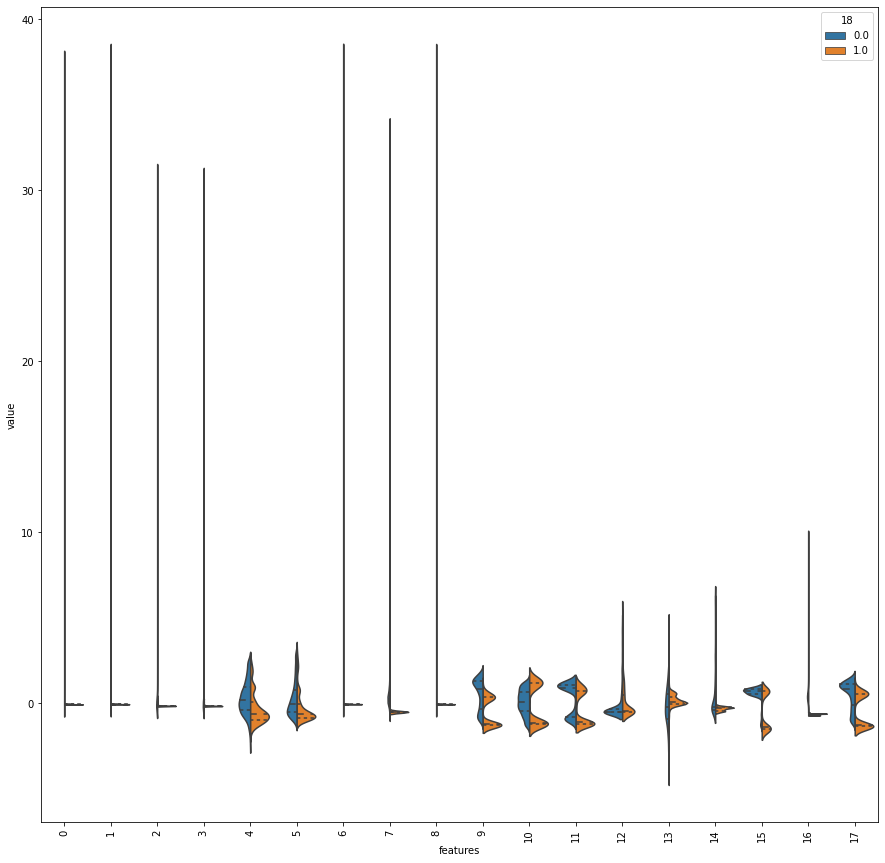

In [55]:
plt.figure(figsize=(15,15))
sns.violinplot(x="features", y="value", hue=18, data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17')])

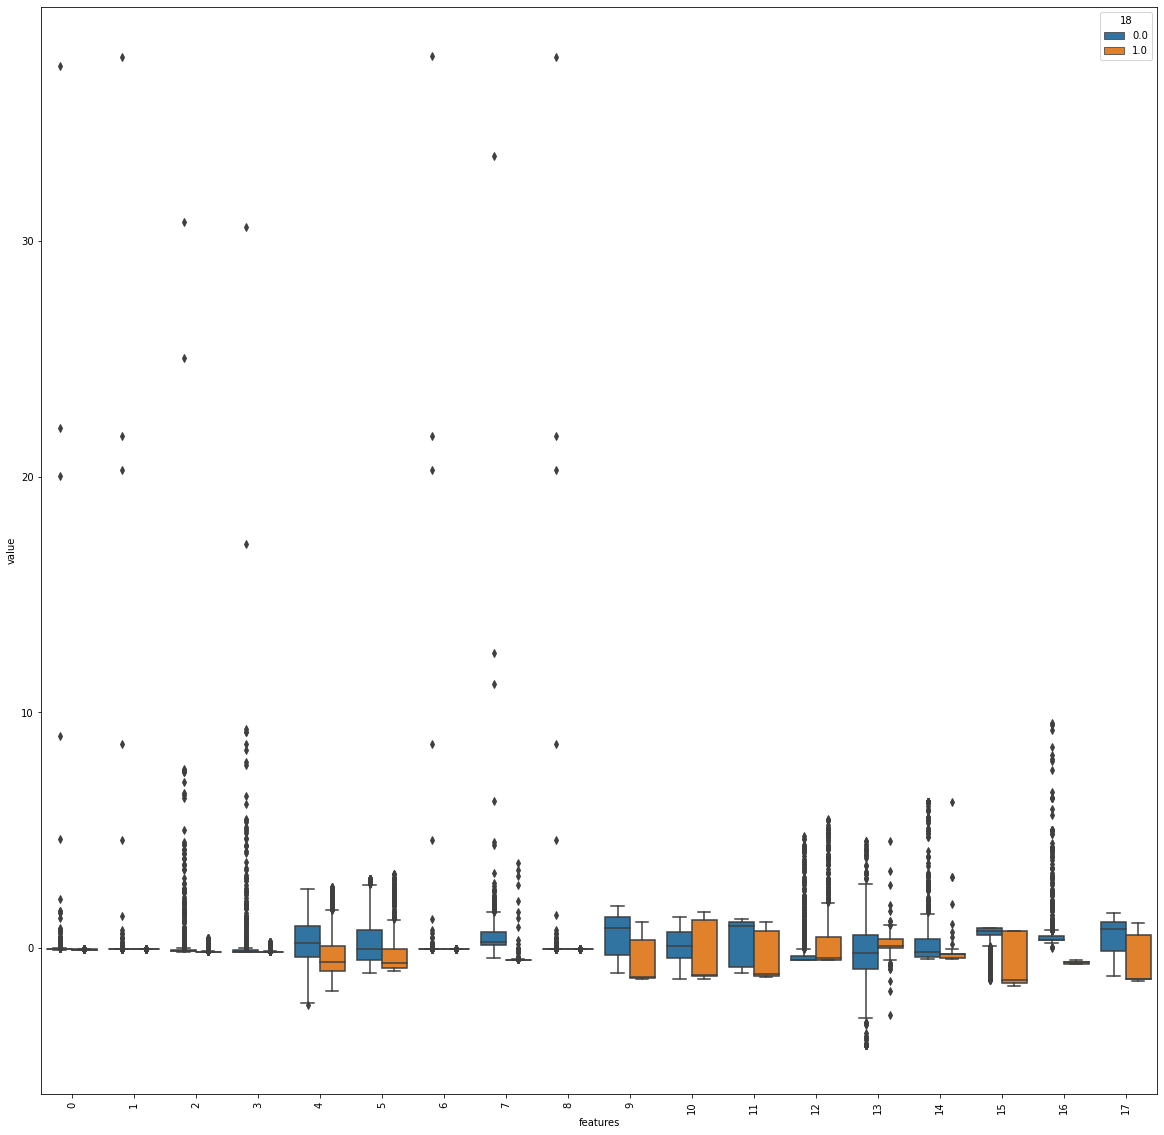

In [56]:
plt.figure(figsize=(20,20))
sns.boxplot(x="features", y="value", hue=18, data=data)
plt.xticks(rotation=90)

**Interpretation:**

From the above plots we can see that the following features look similar in the sense that not much data is available and they do not contribute any relevant information about the dataset:-

Feature Number - 0, 1, 2, 3, 6, 7, 8

Therefore we can drop these features.

In [57]:
#Dropping the features with very low data spread and more outliers
unidir = unidir.drop([0, 1, 2, 3, 6, 7, 8], axis = 1)
unidir

,4,5,9,10,11,12,13,14,15,16,17,18
0,8.209810,73.338288,111.40,36.432309,138.0,0.0000,-0.619560,-1.632168,138.0,62.0,117.149477,1.0
1,3.826652,15.115991,1190.15,489.154504,1476.0,0.0000,-1.234103,-0.301984,1476.0,222.0,1285.821306,0.0
2,2.048102,2.360037,100.45,38.726541,100.0,56.3388,0.014044,-1.996982,153.0,62.0,107.586942,1.0
3,2.449888,5.232243,86.32,35.630789,62.0,0.0000,0.760196,-1.436164,138.0,62.0,93.316665,1.0
4,2.962924,7.338491,87.82,38.034376,62.0,0.0000,0.795772,-1.326532,153.0,62.0,95.626879,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2,4.047414,29.207833,112.70,38.239146,109.5,49.6671,0.249606,1.333212,165.0,76.0,118.949149,1.0
3,6.029786,39.522547,85.80,1.407053,86.0,0.0000,-6.857143,48.020408,86.0,76.0,85.811421,1.0
4,9.849347,98.009791,87.58,11.115718,86.0,0.0000,6.857143,48.020408,165.0,86.0,88.275591,1.0
5,9.849345,98.009773,87.41,8.057991,86.0,0.0000,5.510378,31.364261,133.0,86.0,87.776933,1.0


In [58]:
# Applying the datapreprocessing steps to Unidirectional test dataset as well

test_unidir = test_unidir.drop([0, 1, 2, 3, 6, 7, 8], axis = 1)
test_unidir

,4,5,9,10,11,12,13,14,15,16,17,18
0,6.500759,42.760873,759.62,477.052435,1130.0,0.0000,-0.505193,-1.741964,1130.0,61.0,895.726398,1.0
1,2.413995,3.954437,86.32,35.630789,62.0,0.0000,0.760196,-1.436164,138.0,62.0,93.316665,1.0
2,1.382936,0.912723,103.47,40.319546,138.0,22.2390,-0.036313,-1.956992,153.0,62.0,110.974997,1.0
3,3.921055,21.457496,81.76,33.504144,62.0,0.0000,1.077932,-0.846225,138.0,62.0,88.294960,1.0
4,2.635824,6.429555,86.32,35.630789,62.0,0.0000,0.760196,-1.436164,138.0,62.0,93.316665,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
61,2.976213,9.847388,1228.53,457.828415,1230.0,661.2396,-0.393466,-1.363886,1676.0,273.0,1310.265908,0.0
62,1.990976,4.053052,1261.57,597.963991,1676.0,0.0000,-0.897167,-1.091294,1676.0,224.0,1394.827656,0.0
63,2.269281,3.354474,1526.65,320.412625,1676.0,0.0000,-2.547127,5.524180,1676.0,312.0,1559.582582,0.0
64,4.212096,22.066689,967.26,686.519426,738.0,765.0216,0.017020,-1.947717,1676.0,222.0,1184.140085,0.0


In [59]:
y = unidir[18]
x = unidir

data_dia = y
data = x.drop(18, axis=1)

data_n_2 = (data - data.mean()) / (data.std())              # standardization

In [60]:
data = pd.concat([y,data_n_2.iloc[:,0:12]],axis=1)
data = pd.melt(data,id_vars=18,
                    var_name="features",
                    value_name='value')
data

,18,features,value
0,1.0,4,1.850869
1,0.0,4,-0.084127
2,1.0,4,-0.869288
3,1.0,4,-0.691915
4,1.0,4,-0.465429
...,...,...,...
26626,1.0,17,-1.315568
26627,1.0,17,-1.375724
26628,1.0,17,-1.371251
26629,1.0,17,-1.372156


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '4'),
  Text(1, 0, '5'),
  Text(2, 0, '9'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '16'),
  Text(10, 0, '17')])

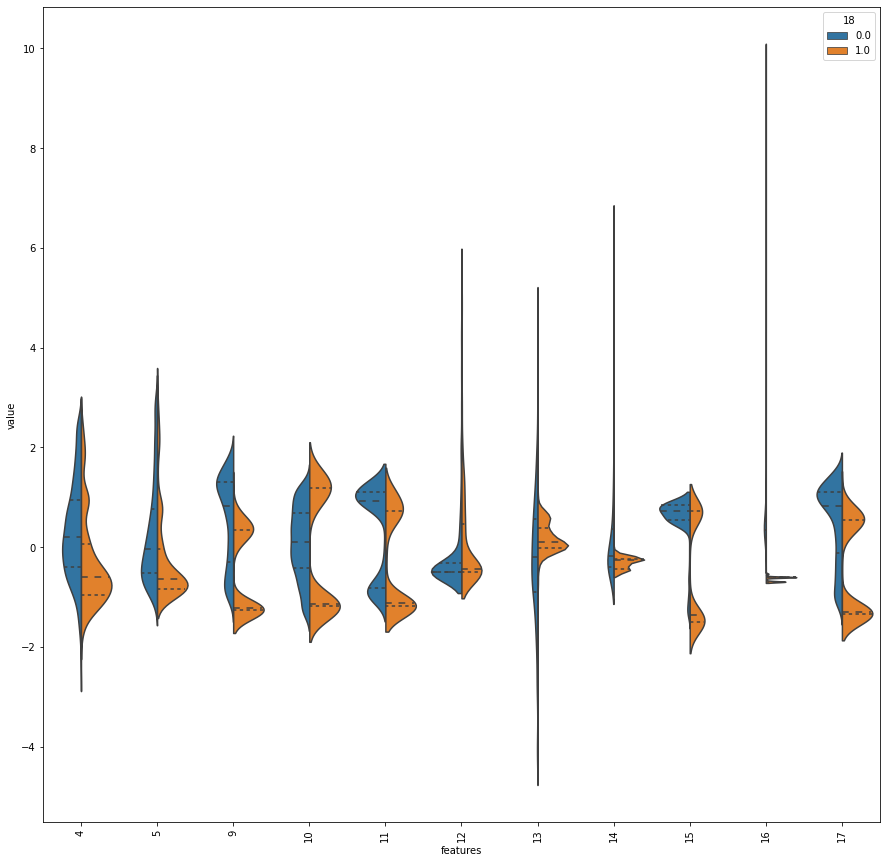

In [61]:
plt.figure(figsize=(15,15))
sns.violinplot(x="features", y="value", hue=18, data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '4'),
  Text(1, 0, '5'),
  Text(2, 0, '9'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '16'),
  Text(10, 0, '17')])

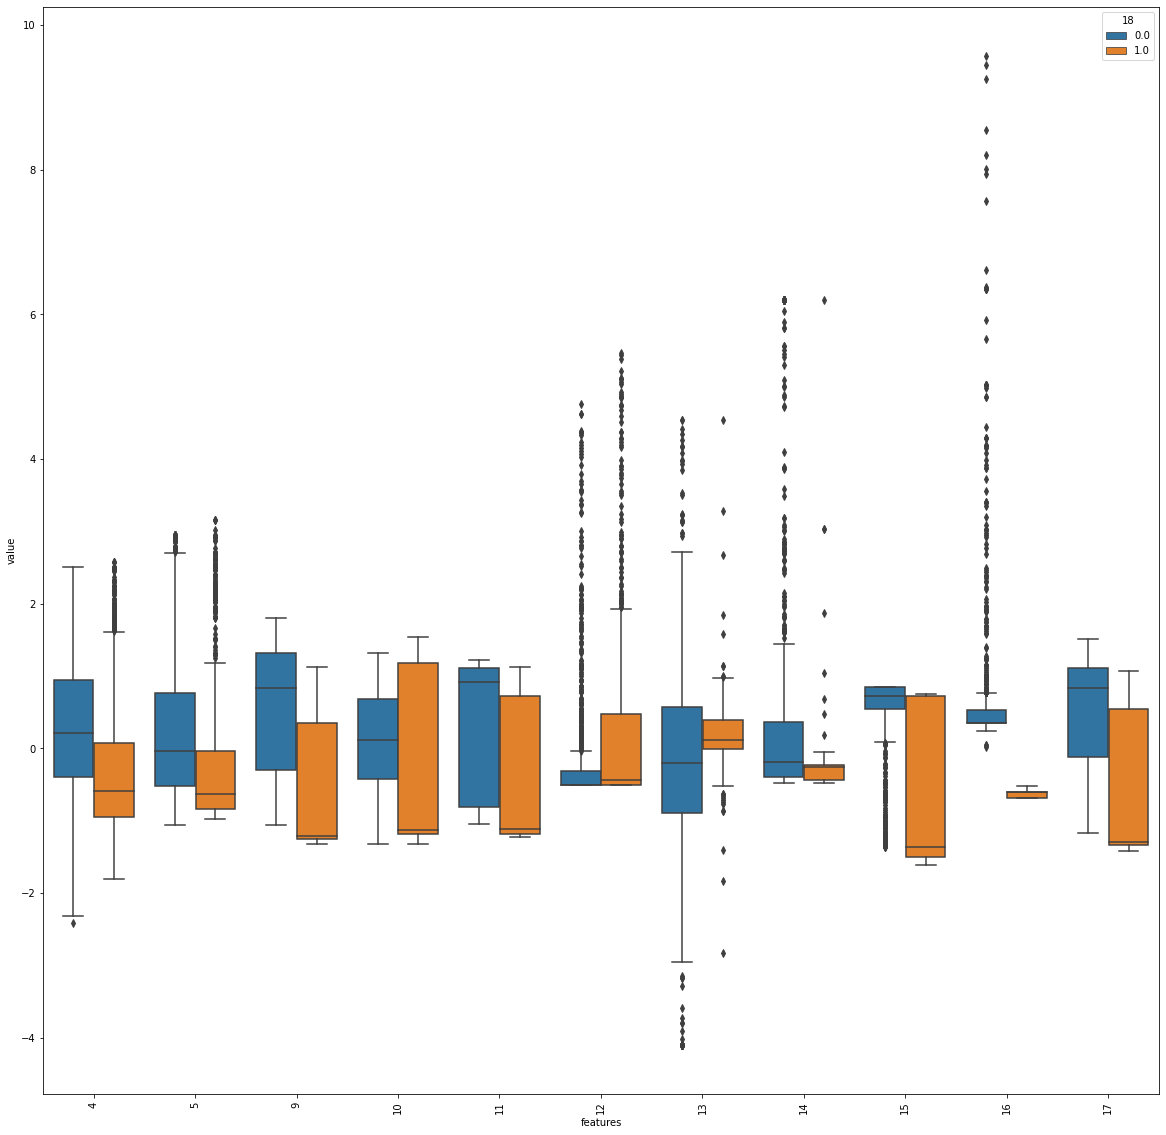

In [62]:
plt.figure(figsize=(20,20))
sns.boxplot(x="features", y="value", hue=18, data=data)
plt.xticks(rotation=90)

<AxesSubplot:>

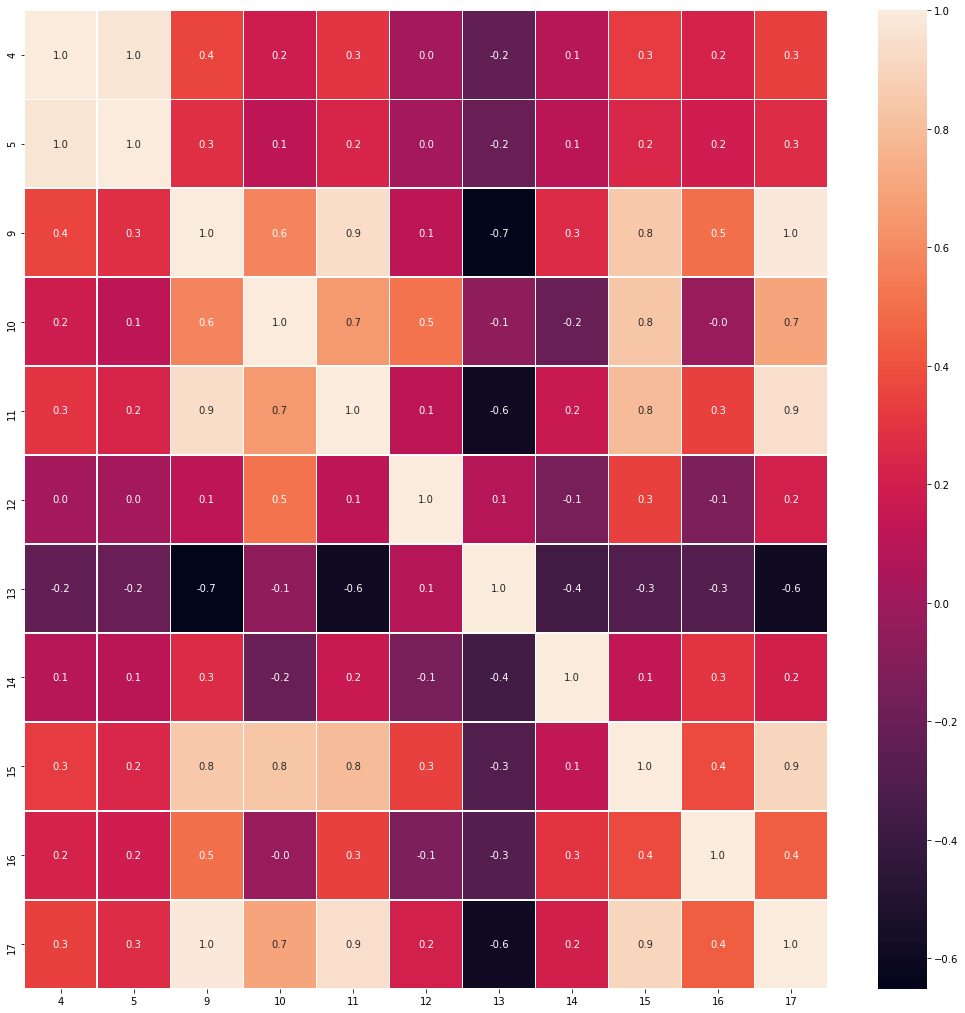

In [63]:
#correlation matrix of unidirectional dataset after feature selection
y = unidir[18]
x = unidir.drop(18, axis = 1) 

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

The heat map plotted above shows the correlation between the different features, pairwise.

The pairplot has been plotted to visualize the relationship between each of the features and histogram of every feature separately.

**APPROACH 1**

Do binary classification of the combined(unidir + bidir) dataset for features 4, 5, 9, 10, 11, 12, 13, 14, 15, 16, 17.

Classification using:-
1. Logistic Regression
2. KNN
3. LDA

In [64]:
#Selcting only the common features between Unidir and Bidir for combined dataset with feature selection 
bidir_new = bidir.drop([22, 23, 27, 28, 29, 30, 31, 32, 33, 35, 40, 41, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53], axis = 1)

unidir_x = unidir.drop(18, axis = 1)
bidir_x = bidir_new.drop(54, axis = 1)

UAVdata = pd.concat([bidir_x, unidir_x], axis = 0)
UAVdata

,4,5,9,10,11,12,13,14,15,16,17
0,0.206939,-1.518004,113.612245,32.643157,138.0,17.7912,-0.524785,-1.621986,153.0,70.0,118.116770
1,2.746796,7.799352,487.000000,392.264657,395.5,255.7485,1.692933,1.546272,1476.0,222.0,622.396138
2,1.884811,2.649103,96.857143,22.093596,88.0,0.0000,1.932871,1.804209,150.0,88.0,99.257242
3,1.088090,-0.287253,98.225806,28.208403,88.0,0.0000,2.800722,8.100519,218.0,76.0,102.070343
4,2.881301,8.274496,96.533333,27.042410,88.0,0.0000,3.245917,10.956115,218.0,76.0,100.127918
...,...,...,...,...,...,...,...,...,...,...,...
2,4.047414,29.207833,112.700000,38.239146,109.5,49.6671,0.249606,1.333212,165.0,76.0,118.949149
3,6.029786,39.522547,85.800000,1.407053,86.0,0.0000,-6.857143,48.020408,86.0,76.0,85.811421
4,9.849347,98.009791,87.580000,11.115718,86.0,0.0000,6.857143,48.020408,165.0,86.0,88.275591
5,9.849345,98.009773,87.410000,8.057991,86.0,0.0000,5.510378,31.364261,133.0,86.0,87.776933


In [65]:
bidir.columns

Int64Index([ 4,  5,  9, 10, 11, 12, 13, 14, 15, 16, 17, 22, 23, 27, 28, 29, 30,
            31, 32, 33, 35, 40, 41, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53,
            54],
           dtype='int64')

In [66]:
unidir.columns

Int64Index([4, 5, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64')

In [67]:
bidir_new.columns

Int64Index([4, 5, 9, 10, 11, 12, 13, 14, 15, 16, 17, 54], dtype='int64')

In [68]:
UAVy = pd.concat([bidir[54], unidir[18]], axis = 0)

In [69]:
UAVy

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
    ... 
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
Length: 6241, dtype: float64

In [70]:
#Combining the test data 
test_bidir_new = test_bidir.drop([22, 23, 27, 28, 29, 30, 31, 32, 33, 35, 40, 41, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53], axis = 1)

test_unidir_x = test_unidir.drop(18, axis = 1)
test_bidir_x = test_bidir_new.drop(54, axis = 1)

test_UAVdata = pd.concat([test_bidir_x, test_unidir_x], axis = 0)
test_UAVdata


,4,5,9,10,11,12,13,14,15,16,17
0,0.595357,-1.414428,123.280702,29.410126,138.0,0.0000,-1.211605,-0.443241,153.0,70.0,126.680355
1,0.817434,-0.945456,102.565217,38.680305,70.0,0.0000,0.358763,-1.785739,165.0,70.0,109.319436
2,0.458063,-1.428265,99.937500,34.831333,70.0,0.0000,0.297781,-1.891191,153.0,70.0,105.654212
3,1.171704,-0.173755,92.206897,31.324773,70.0,0.0000,0.650564,-1.591978,138.0,70.0,97.208627
4,2.325694,5.693968,99.954545,34.017471,70.0,0.0000,0.242662,-1.929726,153.0,70.0,105.335179
...,...,...,...,...,...,...,...,...,...,...,...
61,2.976213,9.847388,1228.530000,457.828415,1230.0,661.2396,-0.393466,-1.363886,1676.0,273.0,1310.265908
62,1.990976,4.053052,1261.570000,597.963991,1676.0,0.0000,-0.897167,-1.091294,1676.0,224.0,1394.827656
63,2.269281,3.354474,1526.650000,320.412625,1676.0,0.0000,-2.547127,5.524180,1676.0,312.0,1559.582582
64,4.212096,22.066689,967.260000,686.519426,738.0,765.0216,0.017020,-1.947717,1676.0,222.0,1184.140085


In [71]:
test_UAVy = pd.concat([test_bidir[54], test_unidir[18]], axis = 0)

In [72]:
X_train_App1 = UAVdata
y_train_App1 = UAVy
X_test_App1  = test_UAVdata
y_test_App1  = test_UAVy

In [73]:
print('X_train_App1 ', X_train_App1.shape)
print('y_train_App1 ', y_train_App1.shape)
print('X_test_App1  ', X_test_App1.shape)
print('y_test_App1  ', y_test_App1.shape)

X_train_App1  (6241, 11)
y_train_App1  (6241,)
X_test_App1   (62495, 11)
y_test_App1   (62495,)


In [74]:
#pickling the train and test dataset for model training and testing with Approach 1
import pickle

pickle_out = open("X_train_App1.pickle","wb")
pickle.dump(X_train_App1, pickle_out)
pickle_out.close()

pickle_out = open("y_train_App1.pickle","wb")
pickle.dump(y_train_App1, pickle_out)
pickle_out.close()

In [75]:
pickle_out = open("X_test_App1.pickle","wb")
pickle.dump(X_test_App1, pickle_out)
pickle_out.close()

pickle_out = open("y_test_App1.pickle","wb")
pickle.dump(y_test_App1, pickle_out)
pickle_out.close()

### Approach 2 

In [76]:
#Selcting only the common features between Unidir and Bidir for combined dataset without feature selection 
bidir_app2_new = bidir_app2.drop([18,19,20,21,22, 23,24,25,26, 27, 28, 29, 30, 31, 32, 33,34, 35, 36,37,38,39,40, 41,42, 43,44, 45, 46, 47, 48, 49, 50, 51, 52, 53], axis = 1)

unidir_x2 = unidir_app2.drop(18, axis = 1)
bidir_x2 = bidir_app2_new.drop(54, axis = 1)

UAVdataApp2 = pd.concat([bidir_x2, unidir_x2], axis = 0)
UAVdataApp2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.013633,0.009907,0.012473,0.013195,0.206939,-1.518004,0.029022,0.000002,0.016793,113.612245,32.643157,138.0,17.7912,-0.524785,-1.621986,153.0,70.0,118.116770
1,0.176876,0.328222,0.050990,0.072377,2.746796,7.799352,1.629773,0.000309,0.369391,487.000000,392.264657,395.5,255.7485,1.692933,1.546272,1476.0,222.0,622.396138
2,0.003496,0.004608,0.001605,0.001622,1.884811,2.649103,0.018668,0.000177,0.005718,96.857143,22.093596,88.0,0.0000,1.932871,1.804209,150.0,88.0,99.257242
3,0.004229,0.005576,0.000986,0.001195,1.088090,-0.287253,0.018410,0.000009,0.006926,98.225806,28.208403,88.0,0.0000,2.800722,8.100519,218.0,76.0,102.070343
4,0.003080,0.005691,0.000934,0.000975,2.881301,8.274496,0.026786,0.000011,0.006387,96.533333,27.042410,88.0,0.0000,3.245917,10.956115,218.0,76.0,100.127918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,0.003500,0.004243,0.002131,0.002714,4.047414,29.207833,0.034427,0.000006,0.005484,112.700000,38.239146,109.5,49.6671,0.249606,1.333212,165.0,76.0,118.949149
3,0.000685,0.000879,0.000517,0.000022,6.029786,39.522547,0.006628,0.000399,0.001110,85.800000,1.407053,86.0,0.0000,-6.857143,48.020408,86.0,76.0,85.811421
4,0.009514,0.089832,0.000515,0.000006,9.849347,98.009791,0.898849,0.000282,0.089887,87.580000,11.115718,86.0,0.0000,6.857143,48.020408,165.0,86.0,88.275591
5,0.009842,0.093143,0.000516,0.000008,9.849345,98.009773,0.931956,0.000223,0.093197,87.410000,8.057991,86.0,0.0000,5.510378,31.364261,133.0,86.0,87.776933


In [77]:
UAVyApp2 = pd.concat([bidir_app2_new[54], unidir_app2[18]], axis = 0)

In [78]:
bidir_app2_new.shape

(3820, 19)

In [79]:
X_train_App2 = UAVdataApp2
y_train_App2 = UAVyApp2

In [80]:
#Combining the test data 

test_bidir_App2_new = test_bidir_App2.drop([18,19,20,21,22, 23,24,25,26, 27, 28, 29, 30, 31, 32, 33,34, 35, 36,37,38,39,40, 41,42, 43,44, 45, 46, 47, 48, 49, 50, 51, 52, 53], axis = 1)

test_unidir_App2_x2 = test_unidir_App2.drop(18, axis = 1)
test_bidir_App2_x2 = test_bidir_App2_new.drop(54, axis = 1)

testUAVdataApp2 = pd.concat([test_bidir_App2_x2, test_unidir_App2_x2], axis = 0)
testUAVdataApp2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.011144,0.010568,0.005403,0.005441,0.595357,-1.414428,0.027908,0.000473,0.015294,123.280702,29.410126,138.0,0.0000,-1.211605,-0.443241,153.0,70.0,126.680355
1,0.009074,0.009746,0.004770,0.005561,0.817434,-0.945456,0.027311,0.000031,0.013160,102.565217,38.680305,70.0,0.0000,0.358763,-1.785739,165.0,70.0,109.319436
2,0.010618,0.009797,0.007069,0.009864,0.458063,-1.428265,0.027570,0.000007,0.014343,99.937500,34.831333,70.0,0.0000,0.297781,-1.891191,153.0,70.0,105.654212
3,0.006668,0.008201,0.002745,0.003318,1.171704,-0.173755,0.026633,0.000009,0.010460,92.206897,31.324773,70.0,0.0000,0.650564,-1.591978,138.0,70.0,97.208627
4,0.009447,0.011816,0.005154,0.005924,2.325694,5.693968,0.052976,0.000005,0.014917,99.954545,34.017471,70.0,0.0000,0.242662,-1.929726,153.0,70.0,105.335179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.185347,0.418130,0.000471,0.000380,2.976213,9.847388,2.378597,0.000103,0.455454,1228.530000,457.828415,1230.0,661.2396,-0.393466,-1.363886,1676.0,273.0,1310.265908
62,0.004195,0.005846,0.001490,0.001971,1.990976,4.053052,0.028068,0.000117,0.007171,1261.570000,597.963991,1676.0,0.0000,-0.897167,-1.091294,1676.0,224.0,1394.827656
63,0.024480,0.061615,0.000810,0.000139,2.269281,3.354474,0.228831,0.000176,0.066013,1526.650000,320.412625,1676.0,0.0000,-2.547127,5.524180,1676.0,312.0,1559.582582
64,1.402095,4.083426,0.001168,0.001552,4.212096,22.066689,29.593049,0.000121,4.298080,967.260000,686.519426,738.0,765.0216,0.017020,-1.947717,1676.0,222.0,1184.140085


In [81]:
test_UAVy = pd.concat([test_bidir_App2_new[54], test_unidir_App2[18]], axis = 0)

In [82]:
X_test_App2 = testUAVdataApp2
y_test_App2 = test_UAVy

In [83]:
print('X_train_App2 ', X_train_App2.shape)
print('y_train_App2 ', y_train_App2.shape)
print('X_test_App2  ', X_test_App2.shape)
print('y_test_App2  ', y_test_App2.shape)

X_train_App2  (6241, 18)
y_train_App2  (6241,)
X_test_App2   (62495, 18)
y_test_App2   (62495,)


In [84]:
#pickling out
pickle_out = open("X_train_App2.pickle","wb")
pickle.dump(X_train_App2, pickle_out)
pickle_out.close()

pickle_out = open("y_train_App2.pickle","wb")
pickle.dump(y_train_App2, pickle_out)
pickle_out.close()

In [85]:
pickle_out = open("X_test_App2.pickle","wb")
pickle.dump(X_test_App2, pickle_out)
pickle_out.close()

pickle_out = open("y_test_App2.pickle","wb")
pickle.dump(y_test_App2, pickle_out)
pickle_out.close()

### Approach 3 

Considering the raw dataset with all features and performing model development for unidir and bidir separately.

In [41]:
#Training Data
bidir_1 = bidir.copy()
unidir_1 = unidir.copy()

test_bidir_1 = test_bidir.copy()
test_unidir_1 = test_unidir.copy()

In [42]:
y_train_bidir = bidir_1[54]
x_train_bidir = bidir_1.drop(54, axis = 1) 

In [43]:
print('y_train_bidir: ',y_train_bidir.shape)
print('x_train_bidir: ',x_train_bidir.shape)

y_train_bidir:  (3820,)
x_train_bidir:  (3820, 54)


In [32]:
y_train_unidir = unidir_1[18]
x_train_unidir = unidir_1.drop(18, axis = 1) 

In [33]:
print('y_train_unidir: ',y_train_unidir.shape)
print('x_train_unidir: ',x_train_unidir.shape)

y_train_unidir:  (2421,)
x_train_unidir:  (2421, 18)


In [ ]:
#Test Data

In [34]:
y_test_bidir = test_bidir_1[54]
x_test_bidir = test_bidir_1.drop(54, axis = 1) 

In [35]:
print('y_test_bidir: ',y_test_bidir.shape)
print('x_test_bidir: ',x_test_bidir.shape)

y_test_bidir:  (38316,)
x_test_bidir:  (38316, 54)


In [36]:
y_test_unidir = test_unidir_1[18]
x_test_unidir = test_unidir_1.drop(18, axis = 1) 

In [37]:
print('y_test_unidir: ',y_test_unidir.shape)
print('x_test_unidir: ',x_test_unidir.shape)

y_test_unidir:  (24179,)
x_test_unidir:  (24179, 18)


In [39]:
#Pickling training data 
import pickle
#Bidir
pickle_out = open("X_train_bidir.pickle","wb")
pickle.dump(x_train_bidir, pickle_out)
pickle_out.close()

pickle_out = open("y_train_bidir.pickle","wb")
pickle.dump(y_train_bidir, pickle_out)
pickle_out.close()

#Unidir 
pickle_out = open("X_train_unidir.pickle","wb")
pickle.dump(x_train_unidir, pickle_out)
pickle_out.close()

pickle_out = open("y_train_unidir.pickle","wb")
pickle.dump(y_train_unidir, pickle_out)
pickle_out.close()

In [40]:
#Pickling test data 
import pickle
#Bidir_test
pickle_out = open("X_test_bidir.pickle","wb")
pickle.dump(x_test_bidir, pickle_out)
pickle_out.close()

pickle_out = open("y_test_bidir.pickle","wb")
pickle.dump(y_test_bidir, pickle_out)
pickle_out.close()

#Unidir_test
pickle_out = open("X_test_unidir.pickle","wb")
pickle.dump(x_test_unidir, pickle_out)
pickle_out.close()

pickle_out = open("y_test_unidir.pickle","wb")
pickle.dump(y_test_unidir, pickle_out)
pickle_out.close()